In [5]:
from climata.acis import StationDataIO

# Load average temperature for sites in Upper Klamath Lake basin
sites = StationDataIO(
    basin="18010203",
    start_date="2017-01-01",
    end_date="2017-01-31",
    parameter="avgt"
)

# Display site information and time series data
for site in sites:
    print(site.name)
    for evt in site.data:
        print(evt.date, evt.avgt)

CHILOQUIN 12 NW (FORT KLAMATH)
2017-01-01 18.0
2017-01-02 22.0
2017-01-03 18.0
2017-01-04 16.0
2017-01-05 -2.0
2017-01-06 -1.0
2017-01-07 -0.5
2017-01-08 23.0
2017-01-09 30.0
2017-01-10 31.5
2017-01-11 32.5
2017-01-12 21.5
2017-01-13 14.0
2017-01-14 16.0
2017-01-15 18.5
2017-01-16 18.0
2017-01-17 16.5
2017-01-18 27.0
2017-01-19 31.0
2017-01-20 33.5
2017-01-21 30.0
2017-01-22 31.5
2017-01-23 26.5
2017-01-24 15.5
2017-01-25 18.0
2017-01-26 29.5
2017-01-27 24.0
2017-01-28 15.0
2017-01-29 16.5
2017-01-30 18.5
2017-01-31 22.0
SELDOM CREEK OREGON
2017-01-01 21.0
2017-01-02 19.5
2017-01-03 19.0
2017-01-04 14.5
2017-01-05 4.5
2017-01-06 4.0
2017-01-07 22.5
2017-01-08 35.5
2017-01-09 29.5
2017-01-10 32.0
2017-01-11 23.5
2017-01-12 20.5
2017-01-13 18.5
2017-01-14 20.0
2017-01-15 24.5
2017-01-16 26.0
2017-01-17 28.5
2017-01-18 33.0
2017-01-19 32.0
2017-01-20 32.0
2017-01-21 30.5
2017-01-22 29.5
2017-01-23 22.0
2017-01-24 22.5
2017-01-25 27.0
2017-01-26 31.5
2017-01-27 24.5
2017-01-28 26.0
2017-01


Which Station Would you Like to Look at?

1  :  Grand Targhee, WY
2  :  Snow Bird, UT
3  :  Squaw, CA
4  :  Sun Valley Station: ID
5  :  Taos Powderhorn, NM
6  :  Vail Station, CO
7  :  Wolf Creek, CO

Enter Number Station Number: 3
Let's Check Out:  ['Squaw, CA', '784:CA']

Select the Dates you would like to Graph
Enter the START date (YYYY-MM-DD): 2021-01-01
Enter the END date (YYYY-MM-DD): 2021-04-01

Would you like to save the data in a file? (Y/N):mySnotelTest

Yes or No Yo

Would you like to save the data in a file? (Y/N):y
What would you like the file to be named? mysnotelTest
Saving CSV...

Station Element Types

1  :  PRECIPITATION INCREMENT
2  :  PRECIPITATION INCREMENT - SNOW-ADJ
3  :  PRECIPITATION ACCUMULATION
4  :  Snow Density
5  :  Snow Rain Ratio
6  :  SNOW DEPTH
7  :  AIR TEMPERATURE AVERAGE
8  :  AIR TEMPERATURE MAXIMUM
9  :  AIR TEMPERATURE MINIMUM
10  :  AIR TEMPERATURE OBSERVED
11  :  WIND DIRECTION AVERAGE
12  :  WIND SPEED AVERAGE
13  :  WIND SPEED MAXIMUM
14  

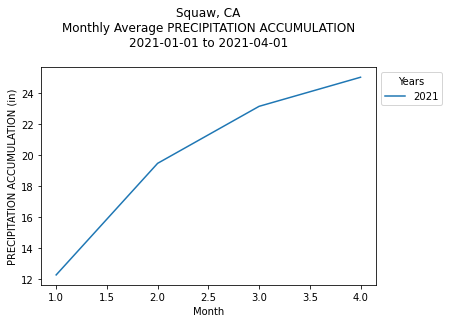


Would You like to save the graph? (Y/N): y
Enter Filename: mysnotelTestG

Would you like to look for another graph? (Y/N):N
Good Bye


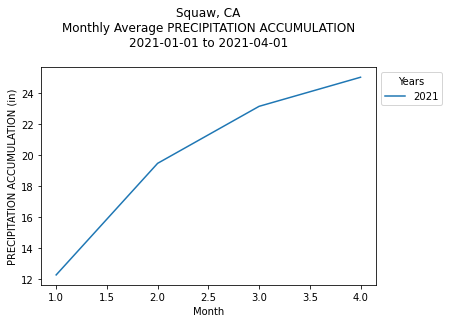

In [1]:
from climata.snotel import StationDailyDataIO
import matplotlib.pyplot as plt
import pandas as pd
import datetime


def chooseStation():
    """" This allows you to pick which station you would like to look at. It returns [station name, #ID]
    The following website is where you can look up other individual stations
    https://www.nrcs.usda.gov/wps/portal/wcc/home/quicklinks/imap"""

    # List of Stations. Other Stations can be added by looking at the link above. Correct Format needed
    stationDict = {'Vail Station, CO': '840:CO',
                   'Sun Valley Station: ID': '895:ID',
                   'Snow Bird, UT': '766:UT',
                   'Wolf Creek, CO': '874:CO',
                   'Taos Powderhorn, NM':  '1168:NM',
                   'Grand Targhee, WY': '1082:WY',
                   'Squaw, CA': '784:CA'}
    #Printing out station choices, and throwing them into a dictionary
    print("\nWhich Station Would you Like to Look at?\n")
    i = 1
    stationChoiceDict = {}  # Making a blank dictionary to store choice values
    for key in sorted(stationDict):  #Looping through the station choices, sorted of course
        stationChoiceDict[i] = [key, stationDict[key]]
        print(i, " : ", key)  # Printing out the code. This allows for the user to choose from the dictionary
        i += 1
    #Choosing the Station, on error repeating the function
    try:
        station_num = int(input("\nEnter Number Station Number: "))
        if station_num > len(stationDict) or station_num < 1:
            print("\nTry Again")
            return chooseStation()
        else:
            stationChoice = stationChoiceDict[station_num]  # Making a list of the Station and it's call number
            return stationChoice
    except:
        print('\nTry Again')
        return chooseStation()


def dateSelector():
    """ This Definition lets the user select the dates of which to look at. Note that the dates must be entered in the
    YYYY-MM-DD Format. The function returns the dates in list format. [Start Date, End Date]"""

    # User input for dates. On error, recalls function.
    print('\nSelect the Dates you would like to Graph')
    try:
        start_date = input("Enter the START date (YYYY-MM-DD): ")
        end_date = input("Enter the END date (YYYY-MM-DD): ")
        start_date_obj = datetime.datetime.strptime(start_date, '%Y-%m-%d')
        end_date_obj = datetime.datetime.strptime(end_date, '%Y-%m-%d')
        if start_date_obj > end_date_obj:
            print('\nStart Date is occurs after End Date. Try Again')
            return dateSelector()
        else:
            return [start_date, end_date]
    except:
        print("\nLet's try entering in those dates again. Enter in the correct format (YYYY-MM-DD)..."
              " Or you'll be seeing this message again")
        return dateSelector()


def climataAPI(datelist, id):
    """This uses the climata api to help get snow coverage Reports
    More infomation on the imported module can be found here: https://pypi.org/project/climata/
    Returns the API data in [datalist, elementist"""

    #API Calls
    print("Downloading Data...")
    startdate = str(datelist[0])
    enddate = str(datelist[1])
    station_id = id + ':SNTL'  # Adding the SNTL to the station ID for formatting reasons
    params = StationDailyDataIO(station=station_id,
                                start_date=startdate,
                                end_date=enddate)
    elementlist = []  # blanklist to store element names in
    datalist = []  # blanklist to store values in
    i = 0
    for param in params:  # Making Element List and the respective data that goes with it
        elementlist.append(param.element_name)  # This is storing a list of element names
        i += 1
        for row in param.data:  # Ripping through the rows in the data and adding it to a data list
            datalist.append([elementlist[i-1], row.date, row.value, param.storedunitcd])
            # Data is stored [Element, date, value, measurement]
    return [datalist, elementlist]


def save_imported_date(stationname, datalist):
    """Taking the api data and saving it into a csv file with some user input."""

    try:
        savefile = str(input("\nWould you like to save the data in a file? (Y/N):"))
        if savefile == 'y' or savefile == 'Y' or savefile == 'Yes' or savefile == 'yes':  # If yes save the file
            filename = input("What would you like the file to be named? ")
            print("Saving CSV...")
            filename = filename + ".csv"
            headers = 'Station Name,State,Data Type,Value,Value_Type,Date\n'
            packstring = headers
            # Pack data into a string so that it can be written to the file easily
            for i in datalist:
                packstring += stationname[0] + ','  # Station Name then States (string has a comma in it)
                packstring += i[0] + ',' # Data Type
                packstring += str(i[2]) + ','  # Value
                packstring += i[3] + ','  # Value Type
                packstring += i[1].strftime('%m/%d/%Y') + '\n'  # Dates (which have been converted to a string
            #Writing packstring to file
            with open(filename, mode='w', encoding='UTF-8') as f:
                f.write(packstring)
            return filename
        elif savefile == 'n' or savefile == 'N' or savefile == 'No' or savefile == 'no':
            return 'file not saved'
        else:
            print("\nYes or No Yo")
            save_imported_date(stationname, datalist)
    except:
        print("Let try this again!")
        return save_imported_date(stationname, datalist)


def chooseElement(elementlist):
    """This lets the user select which list of data they would like to use"""
    print("\nStation Element Types\n")
    for i in range(len(elementlist)):
        print(i+1, " : ", elementlist[i])
    try:
        userelement = int(input("\nEnter Element Number: "))
        userselect = elementlist[userelement-1]
        return userselect
    except:
        print("\nTry Again. Quit Entering in the wrong Formats")
        return chooseElement(elementlist)


def selectelement(elementname, datastring):
    """this function goes through the data string, and selects the one with the correct Element. This is then put into
    a year dictionary"""

    datelist = []
    metriclist = []

    for i in datastring:
        if i[0] == elementname:  # first i of this list. But is also coorelated to the element list
            datelist.append(i[1])
            metriclist.append(i[2])
            valuetype = str(i[3])
    return datelist, metriclist, valuetype


def showgraph(graphdata, graph_type, graph_title, stationName):
    """Make a graph of the selected data and displaying it as a monthly average. Year over year. Matplotlib
    and pandas are used to achieve this."""

    df = pd.DataFrame({'value': graphdata[1]}, index=pd.DatetimeIndex(graphdata[0]))  #Taking my data and throwign it into pandas!
    pv = pd.pivot_table(df, index=df.index.month, columns=df.index.year, values='value')  # Taking an Average of the months and displaying it by year
    print('\n',pv)  #Printing out the Data Table so you can see the differences
    pv.plot()  #Plotting the Data Frame

    #Graph labels, titles and legends
    plt.xlabel("Month")
    plt.ylabel(graph_type + " (" + graphdata[2]+")")
    plt.title(stationName + "\n" + "Monthly Average " + graph_type + "\n" + graph_title[0] + " to " + graph_title[1]+ "\n")
    plt.legend(title='Years', bbox_to_anchor=(1,1), loc='upper left')  # Moving my Legend off to the right handside of the graph
    plt.show()


def savegraph(graphdata, graph_type, graph_title, stationName):
    """Remaking the graph to save. Matplotlib does not allow you to show the graph and save it in the same call.
    There for we make the graph again so that we can save it"""

    #Recreating the graph
    df = pd.DataFrame({'value': graphdata[1]}, index=pd.DatetimeIndex(graphdata[0]))  #Taking my data and throwign it into pandas!
    pv = pd.pivot_table(df, index=df.index.month, columns=df.index.year, values='value')  # Taking an Average of the months and displaying it by year
    pv.plot()

    #Graph labels, titles and legends
    plt.xlabel("Month")
    plt.ylabel(graph_type + " (" + graphdata[2]+")")
    plt.title(stationName + "\n" + "Monthly Average " + graph_type + "\n" + graph_title[0] + " to " + graph_title[1]+ "\n")
    plt.legend(title='Years', bbox_to_anchor=(1,1), loc='upper left')  # Moving my Legend off to the right handside of the graph

    #Giving the user the option to save the graphe
    try:
        save_graph = str(input("\nWould You like to save the graph? (Y/N): "))
        if save_graph == 'y' or save_graph == 'Yes' or save_graph == 'yes' or save_graph == 'Y':
            filename = str(input("Enter Filename: "))
            plt.savefig(filename + '.png',bbox_inches='tight', pad_inches=.3)  # Padding the file so the titles make it in the graph
            return
        elif save_graph == 'n' or save_graph == 'No' or save_graph == 'no' or save_graph == 'N':
            print('File not saved')
            return
        else:
            print("\nFormat. Y/N... we've gone through this before...")
            return savegraph(graphdata, graph_type, graph_title, stationName)
    except:
        print("\nFormat. Y/N... we've gone through this before...")
        return savegraph(graphdata, graph_type, graph_title, stationName)


def runprogram():
    """This Function Runs the whole program from the top. This allows the user to decide if they would like to
    make multiple graphs"""

    station_name_call = chooseStation()  # This lets the user choose the station. Returns, [Station Name, #ID]
    print("Let's Check Out: ", station_name_call)  # Printing out the selection
    dateSelected = dateSelector()  # Letting the user select the dates they would like to graph [start date, end date]
    snowData = climataAPI(dateSelected, station_name_call[1])  #Pinging API [[data],[elements]]
    save_imported_date(station_name_call, snowData[0])  # Choice to save the imported data
    element = chooseElement(snowData[1])  # Choose the element you would like to graph
    graphdata = selectelement(element, snowData[0])  # Composition [[Data List], [metriclist], 'valuetype']
    showgraph(graphdata, element, dateSelected, station_name_call[0])
    savegraph(graphdata, element, dateSelected, station_name_call[0])

    #Asking the user if they would like to make another graph
    try:
        andAgain = input("\nWould you like to look for another graph? (Y/N):")
        if andAgain == 'y' or andAgain == 'Y' or andAgain == 'yes' or andAgain == 'Yes':
            return runprogram()
        else:
            return
    except:
        return


# Start the program
runprogram()
print("Good Bye")